In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#On définit les paramètres du système
alpha = 2e-1
beta = 1e-1
gamma = 2e-1
delta = 1e-1

In [4]:
def equa(t, x, y): #equation de Lotka-Volterra
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

Pour tout le problème, on pose :
$$
\begin{array}{ccccc}
f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
  & & (x_1,x_2) & \mapsto & \begin{pmatrix} x_1(\alpha - \beta x_2)\\ x_2(\gamma - \delta x_1) \end{pmatrix}
\end{array}
$$

# Question 1:
## Signification physique des paramètres:
$\alpha$ est le taux de reproduction des proies : plus il y en a, plus elles se reproduisent.  
$\beta$ est le nombre de proies que chaque prédateur mange à fréquence de temps régulière : plus il est grand, plus les proies diminuent.  
$\gamma$ est le taux de reproduction des prédateurs : plus il y en a, plus il est diificile de chasser et donc de se reproduire.  
$\delta$ est le nombre de proies disponibles par prédateur : plus il est grand, plus les prédateurs se reproduisent. 

## Points d'équilibre:
Pour trouver les points d'équilibre du système, on résout:
$$
\left\{
    \begin{array}{ll}
        x_1(\alpha - \beta x_2) = 0 \\
        x_2(\gamma - \delta x_1) = 0 
    \end{array}
\right.
$$
ce qui donne comme solution en particulier le point $(0, 0)$ et l'unique point sur $\mathbb{R_+^*}^2$ : $\bar{x} = $ $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$

# Question 2

## Champ de vecteurs

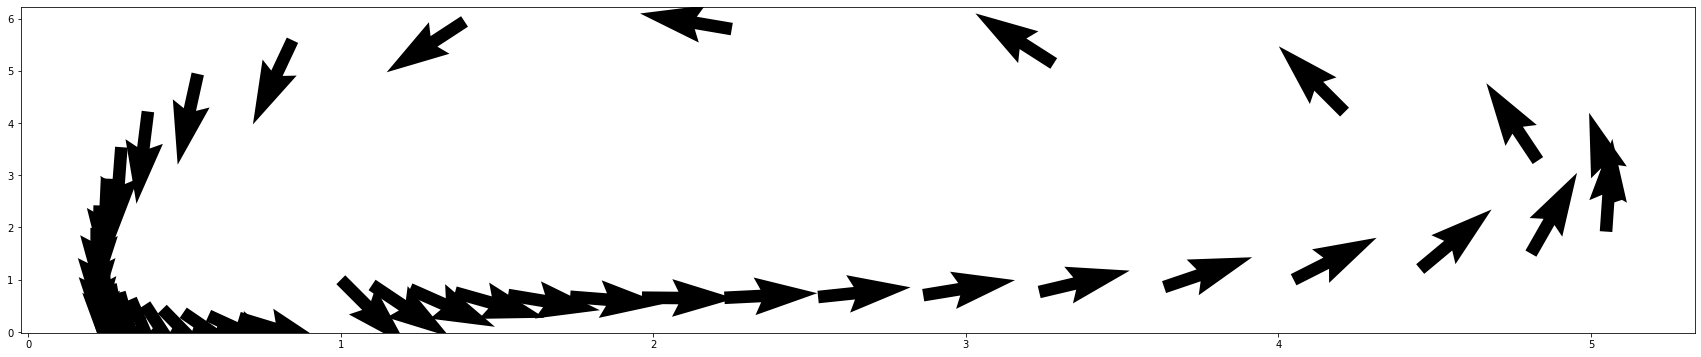

In [5]:
# Dessin du champ de vecteurs issu de l'equation de Lotka-Volterra
plt.figure(figsize=(30, 6))
begin = 1
end = 1
for i in range(40):
    vector_x, vector_y = equa(0, begin, end)
    plt.quiver(begin, end, vector_x, vector_y)
    begin += vector_x
    end += vector_y

## Portrait de phase

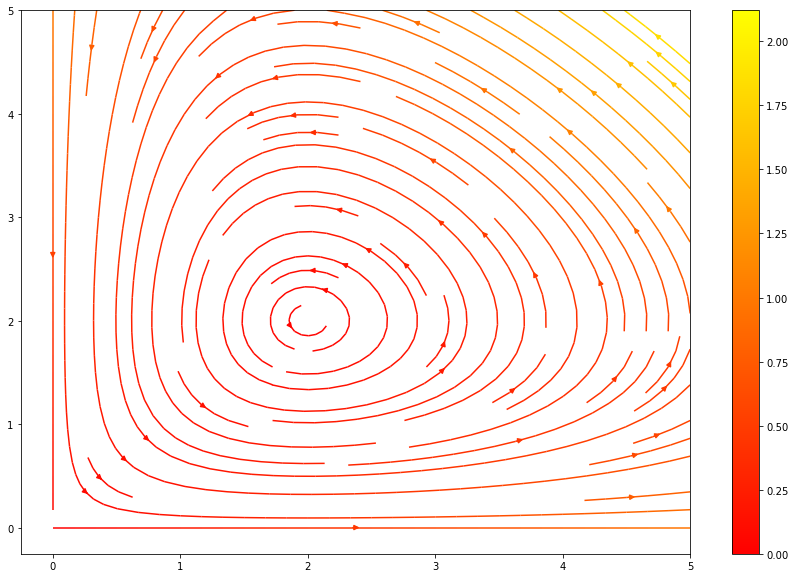

In [6]:
fig = plt.figure(figsize= (15, 10))
Y, X = np.mgrid[0:5:1000j, 0:5:1000j]
U, V = equa(0, X, Y)
# plt.streamplot(X, Y, U, V, density=1, color=U, cmap="autumn")
fig.colorbar(plt.streamplot(X, Y, U, V, color=np.sqrt(U**2+V**2), cmap="autumn").lines)

# Question 3

Les composantes de $f$ sont polynomiales donc elle est continue et continuement différentiable (par rapport à x).  
Par le théorème de Cauchy-Lipschitz, le solution maximale d'un problème de Cauchy sur l'équation de Lokta-Volterra est unique.  

Soit $x_0 = (x_{10}, x_{20}) \in \mathbb{R_+^*}^2$ et $x$ une solution de l'équation de Lokta-Volterratelle que $x(t_0) = x_0$.
Supposons qu'il existe $t_1$ tel que $x(t_1)_1 = 0$ et $x(t_1)_2 > 0$.  
La fonction $y(t) = (0, y_2(t))$ où $ \overset{\circ}{y_2} = \gamma y_2  $ et $y(t_1)_2 =  x(t_1)_2$ est solution du problème de Cauchy : 
$$
\left\{
    \begin{array}{ll}
        \overset{\circ}{x_1} = x_1(\alpha - \beta x_2) \\
        \overset{\circ}{x_2} = x_2(\gamma - \delta x_1) \\
        x(t_1) = (0, x(t_1)_2)
    \end{array}
\right.
$$
$x$ est aussi solution du même de problème de Cauchy donc par unicité des solutions maximales : $ x = y $ d'où $x_1 = 0$, ce qui est absurde car $x_{10} \neq 0$.  
D'où les solutions de Lokta-Volterra ne peuvent pas couper l'axe des abscisses et de manière symétrique (en appliquant le même raisonnement) l'axe des ordonnées. Ainsi $x$ reste dans le plan R>0*R>0.

# Question 4

In [7]:
def H(x, y):
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

Calculons la dérivée de H pour $x = (x_1, x_2)$ une solution de l'équation de Lokta-Volterra initialisée dans $\mathbb{R_+^*}^2$ définie sur un intervalle $I$ de $\mathbb{R}$.  
On a pour tout $t$ $\in$ $I$:
$$
\frac{dH(t)}{dt} = \delta \overset{\circ}{x_1} - \gamma \frac{\overset{\circ}{x_1}}{x_1} + \beta \overset{\circ}{x_2} - \alpha \frac{\overset{\circ}{x_2}}{x_2}
$$

ce qui donne en remplaçant $\overset{\circ}{x}$ et $\overset{\circ}{y}$ par leurs expressions dans l'équation de Lokta-Volterra, 
$$
\frac{dH(t)}{dt} = -\delta x_1(\alpha - \beta x_2) + \gamma (\alpha - \beta x_2) + \beta x_2(\gamma - \delta x_1) - \alpha (\gamma - \delta x_1)
$$
d'où:
$$
\frac{dH(t)}{dt} = 0
$$
H est donc constant sur les solutions de l'équation de Lokta-Volterra.

Notons $x$ une solution de Lokta-Volterra définie sur $\mathbb{R_+^*}^2$.  
$f$ est indépendante de t donc par le théorème du domaine maximale d'existence, soit $x$ diverge en temps fini, soit $x$ est définie sur $\mathbb{R}$. Or si $x$ diverge alors l'un de ses composantes diverge aussi et H aussi, ce qui est impossible car H est constant dans le temps. 


# Question 5

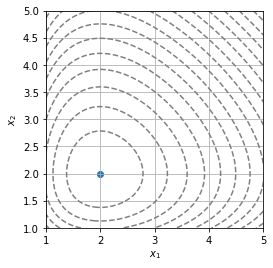

In [8]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    #fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed",
        levels=levels
    )
    #ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
display_contour(H, np.linspace(1, 5, 1000), np.linspace(1, 5, 1000), 20)
plt.scatter(gamma/delta, alpha/beta)

Par analyse graphique, on conclut que les solutions théoriques de l'équation de Lokta-Volterra sont des ellipsoïdes. On s'attend donc à des solutions périodiques qui ont des tendances prévisibles et oscillatoires qui ne divergent ni ne convergent pas dans le temps. Les ellipsoïdes sont centrés autour du point d'équilibre $\bar{x}$ qui est donc stable. 

# Question 6

In [9]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f(t, *x[:, i])
    return t, x

## Test sur des solutions connus

On commence par tester euler explicite sur l'équation différentielle $\overset{\circ}{x} = x$ dont la solution est la fonction exponentielle.

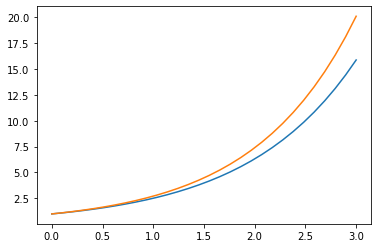

In [10]:
def test(t, x):
    return x

def test_2(t, x, y):
    return np.array([y,-x])

t, x = solve_euler_explicit(test, [1], 1e-1, 0, 3)
plt.plot(t, x[0,:], label = "euler explicite")
plt.plot(t, np.exp(t), label = "solution théorique")

On teste aussi le schéma euler explicite sur l 'équation $\overset{\circ \circ}{x} = -x$ dont la solution est la fonction sin.

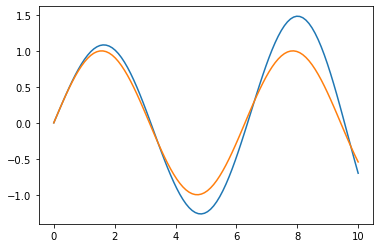

In [11]:

t, x = solve_euler_explicit(test_2, [0, 1], 1e-1, 0, 10)
plt.plot(t, x[0,:], label = "euler explicite")
plt.plot(t, np.sin(t))

Le résultat est proche de la fonction d'origine et on peut valider euler explicite.

## Question 7

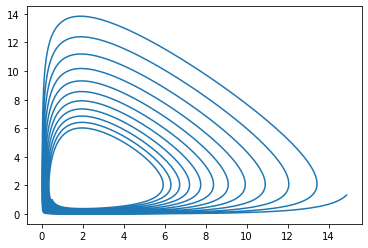

In [12]:
t, x = solve_euler_explicit(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

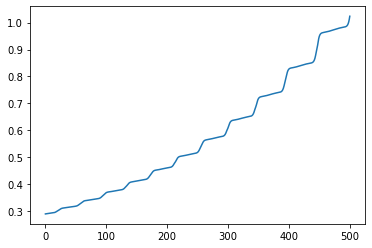

In [13]:
plt.plot(t, H(x[0, :], x[1, :]))

H n'est indéniablement plus constant et diverge vers l'infini en l'infini

Le résultat ne reste pas sur les lignes de niveau de H et diverge. Il n'est plus cohérent avec ce qui est attendu ce qui montre que le schéma d'euler explicite est insuffisant pour modéliser cette équation.

# Question 8

In [14]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=100):
    
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        
        def F(x_i):
            return x[:,i] + dt*f(t[i+1], *x_i)
            
        result = x[:,i] + dt*f(t[i], *x[:,i])
        for _ in range(itermax):
            result = F(result)
        x[:, i+1] = result
        
    return t, x

## Test sur des solutions connus

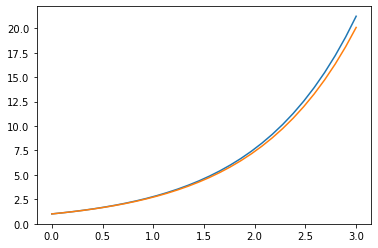

In [15]:
def test(t, x):
    return x

def test_2(t, x, y):
    return np.array([y, -x])

t, x = solve_euler_implicit(test, [1], 1e-1, 0, 3)
plt.plot(t, x[0,:], label = "euler explicite")
plt.plot(t, np.exp(t), label = "solution théorique")

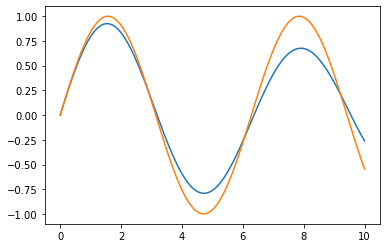

In [16]:
t, x = solve_euler_implicit(test_2, [0, 1], 1e-1, 0, 10)
plt.plot(t, x[0,:], label = "euler explicite")
plt.plot(t, np.sin(t), label = "solution théorique")

## Test sur Lotka-Volterra

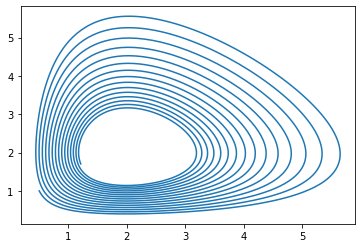

In [17]:
t, x = solve_euler_implicit(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

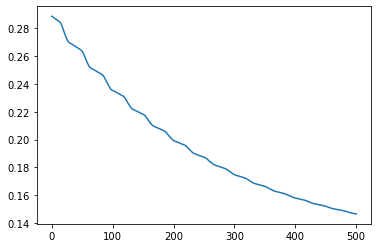

In [18]:
plt.plot(t, H(x[0, :], x[1, :]))

H n'est pas constant non plus car décroissant et tend vers 0 en temps infini. La solution tend vers le point d'équilibre stable $\bar{x}$.
Le schéma d'euler implicite n'est pas suffisant pour modéliser le système.

# Question 9

Etant donné que $H$ est constant sur les solutions de l'équation de Lokta-Volterra, il est égal à $H(x(0))$, donc toute solution de l'équation de Lokta-Volterra est solution de celle donnée en énoncée que l'on notera $(E)$.  

Réciproquement, soit $x$ une solution de $(E)$. Notons $g := H(x(-)) - H(x(0))$ une fonction de $t$ et montrons que g est constant au cours du temps. 
En dérivant par rapport au temps on a que :
$$
g' = g*f 
$$
où $f$ est une fonction explicitée à la question 10.  
Ainsi $g$ est une fonction d'une variable, solution d'une équation différentielle linéaire homogène d'ordre 1 et telle que $g(0) = 0$.  
D'où $g$ est nulle sur $\mathbb{R}$.

Soit $x_{LV}$ la solution de l'équation de Lotka-Volterra telle que $x_{LV}(0) = x(0)$.
$(E)$ est donc la même que l'équation de Lokta-Volterra car $H$ est constante pour une solution de $(E)$.  
$x$ et $x_{LV}$ sont solutions de l'équation de Lokta-Volterra et égales un point et donc égales par unicité des solutions de Lokta-Volterra.
Le sens réciproque et l'équivalence sont ainsi montrés.  

# Question 10

Calculons la dérivée de $H$ le long des solutions du nouveau système:
$$
\frac{d(H(x(t)) - H_0)}{dt} = \delta \overset{\circ}{x_1} - \gamma \frac{\overset{\circ}{x_1}}{x_1} + \beta \overset{\circ}{x_2} - \alpha \frac{\overset{\circ}{x_2}}{x_2}
$$)
d'où en remplaçant par les dérivées découlant du système, après simplification:
$$
\frac{d(H(x(t)) - H_0)}{dt} = \left[ u_1( \frac{\gamma}{x_1} - \delta) + u_2( \frac{\alpha}{x_2} - \beta) \right] (H(x(t) - H_0)
$$
Ainsi en choississant 
$$
\begin{array}{ccccc}
u & : & \mathbb{R_+^*}^2 & \to & \mathbb{R}^2 \\
  & & (x_1,x_2) & \mapsto & k\begin{pmatrix} \delta - \frac{\gamma}{x_1}\\ \beta - \frac{\alpha}{x_2} \end{pmatrix}
\end{array}
$$
on obtient la forme recherchée pour $k \in \mathbb{R}$.

Supposons que $x$ solution du nouveau système reste à distance strictement positive de $\bar{x}$.

# Question 11

Afin de rendre les schémas d'euler performants pour le système de Lotka-Volterra, on modifie la fonction $f$ en ajoutant le terme $u(H - H_0)$ pour forcer les solutions à rester sur les lignes de niveaux de $H$.

## Modification des schémas d'euler

In [86]:
k = 1 #valeur arbitraire pour le moment

def u(x,y, k):
    return np.array([k*(delta - gamma/x), k*(beta - alpha/y)])

In [82]:
def solve_euler_explicit_modified(f, x0, dt, t0, tf, k = 1):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    def f_modified(t, *x):
        return f(t, *x) - u(*x, k = k)*(H(*x) - H(*x0))

    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f_modified(t, *x[:, i])
    return t, x

In [83]:
def solve_euler_implicit_modified(f, x0, dt, t0, tf, itermax=100, k = 1):
    
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    def f_modified(t, *x):
        return f(t, *x) - u(*x, k = k)*(H(*x) - H(*x0))

    for i in range(len(t)-1):

        def F(x_i):
            return x[:,i] + dt*f_modified(t[i+1], *x_i)
            
        result = x[:,i] + dt*f(t[i], *x[:,i])
        for _ in range(itermax):
            result = F(result)
        x[:, i+1] = result
        
    return t, x

## Test d'euler explicite

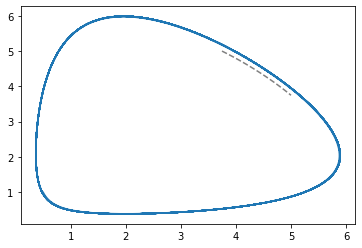

In [48]:
t, x = solve_euler_explicit_modified(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

x_bis, y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
X, Y = np.meshgrid(x_bis, y_bis)
plt.contour(
        X, Y, H(X,Y), colors="grey", linestyles="dashed",
        levels= [H(1/2, 1)]
    )

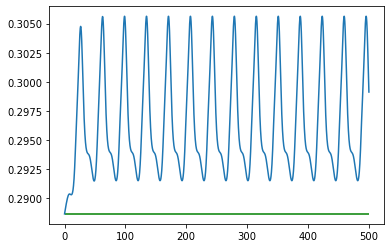

In [49]:
plt.plot(t, H(x[0, :], x[1, :]))
plt.hlines(H(1/2, 1), 0, 500, color = 'g')

Le schéma d'Euler explicite ne diverge plus mais la courbe finale est sur une courbe de niveau légèrement supérieure à celle attendue comme l'atteste le tracé de l'evolution de $H$ (deuxième courbe en bleu) et de la valeur attendue (en vert).

## Test d'euler implicite

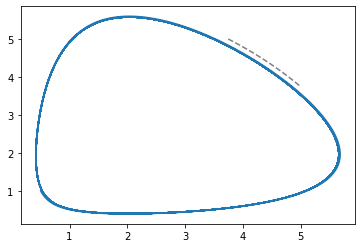

In [24]:
t, x = solve_euler_implicit_modified(equa, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

x_bis,  y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
X, Y = np.meshgrid(x_bis, y_bis)
plt.contour(
        X, Y, H(X,Y), colors="grey", linestyles="dashed",
        levels= [H(1/2, 1)]
    )

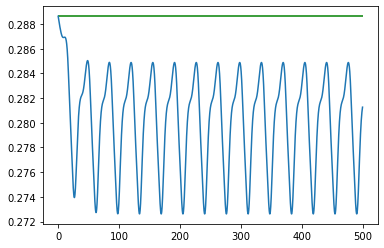

In [25]:
plt.plot(t, H(x[0, :], x[1, :]))
plt.hlines(H(1/2, 1), 0, 500, color = 'g')

Le schéma d'Euler implicite ne diverge plus mais la courbe finale est sur une courbe de niveau légèrement inférieure à celle attendue (mêmes graphes que pour euler explicite).

## Influence de la valeur de $k$

In [133]:
def test_k_explicit(k_test, x_test, y_test, pas = 1e-1, debut = 0, fin = 500):

    plt.figure(figsize = (15, 6))
    t, x = solve_euler_explicit_modified(equa, [x_test, y_test], pas, debut, fin, k = k_test)
    plt.plot(x[0, :], x[1, :])

    x_bis,  y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
    X, Y = np.meshgrid(x_bis, y_bis)
    plt.contour(
            X, Y, H(X,Y), colors="grey", linestyles="dashed",
            levels= [H(x_test, y_test)]
        )
    plt.show()
    plt.figure(figsize = (15, 6))
    plt.plot(t, H(x[0, :], x[1, :]))
    plt.hlines(H(x_test, y_test), 0, 500, color = 'g')
    plt.show()


def test_k_implicit(k_test, x_test, y_test, pas = 1e-1, debut = 0, fin = 500):
    plt.figure(figsize = (15, 6))
    t, x = solve_euler_implicit_modified(equa, [x_test, y_test], pas, debut, fin, k = k_test)
    plt.plot(x[0, :], x[1, :])

    x_bis,  y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
    X, Y = np.meshgrid(x_bis, y_bis)
    plt.contour(
            X, Y, H(X,Y), colors="grey", linestyles="dashed",
            levels= [H(x_test, y_test)]
        )
    plt.show()
    plt.figure(figsize = (15, 6))
    plt.plot(t, H(x[0, :], x[1, :]))
    plt.hlines(H(x_test, y_test), 0, 500, color = 'g')
    plt.show()

### Euler explicite

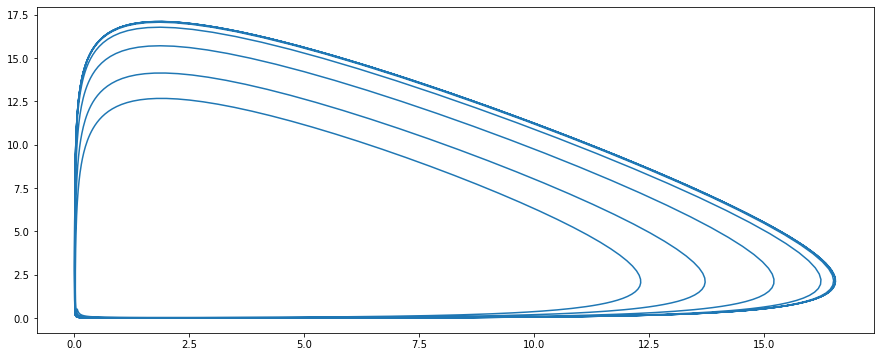

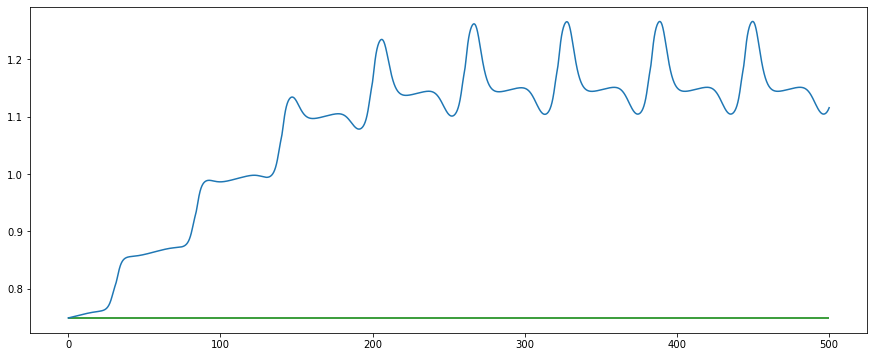

In [102]:
test_k_explicit(1e-5, 1/16, 1/2)

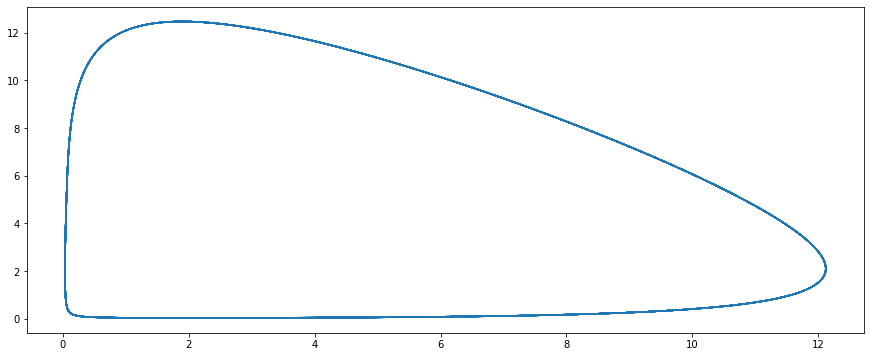

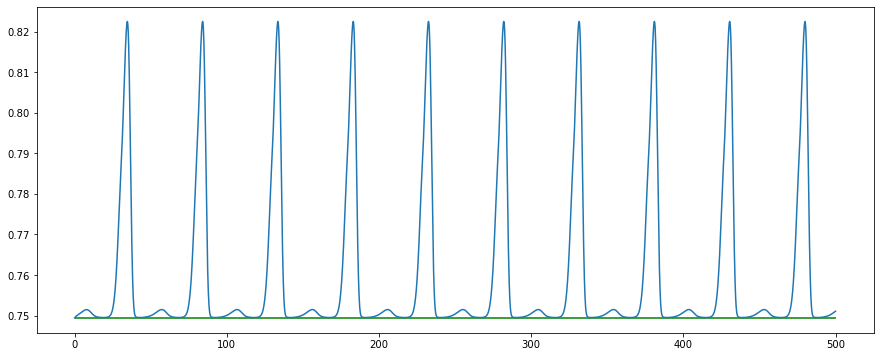

In [103]:
test_k_explicit(1e-1, 1/16, 1/2)

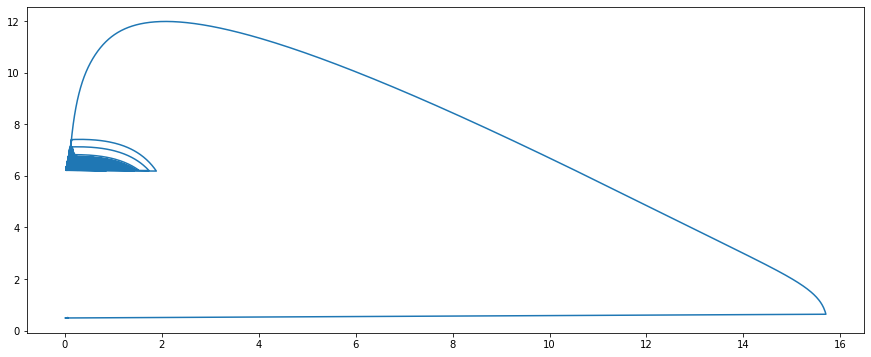

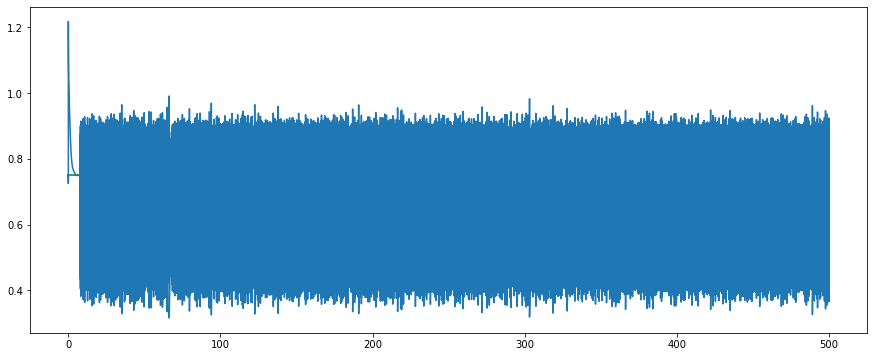

In [111]:
test_k_explicit(100, 1/16, 1/2, pas = 1e-2)

### Euler implicite

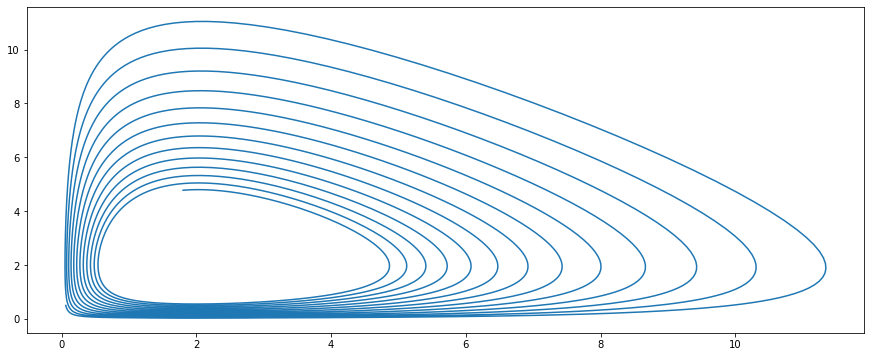

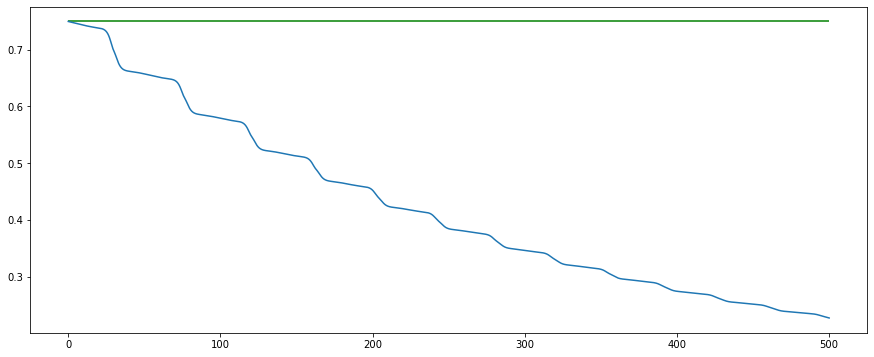

In [97]:
test_k_implicit(1e-5, 1/16, 1/2)

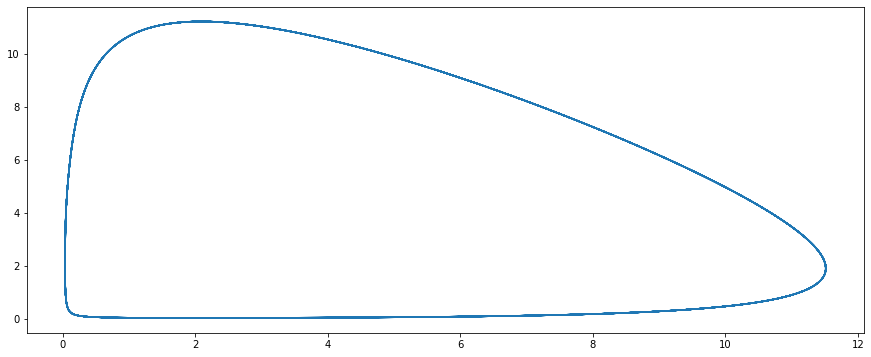

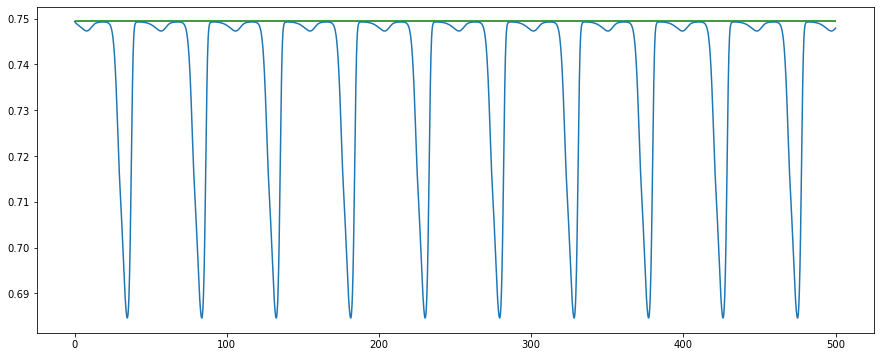

In [98]:
test_k_implicit(1e-2, 1/16, 1/2)

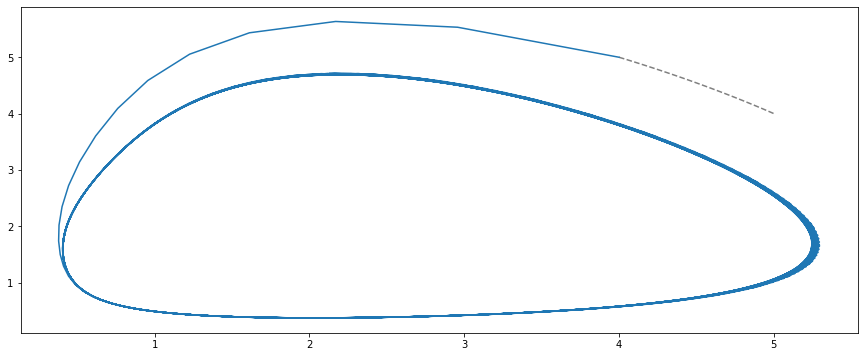

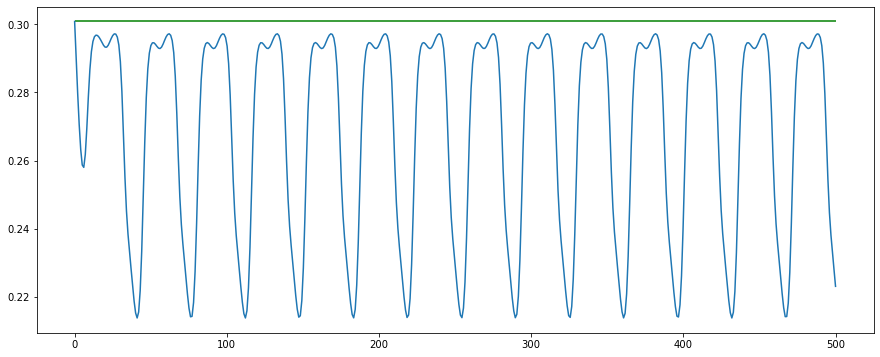

In [161]:
test_k_implicit(5, 4, 5, pas = 1)

Les conclusions sont les mêmes pour les deux schémas. $k$ doit être choisi en fonction des variations "naturelles" des schémas dues aux erreurs de calcul d'intégrales. S'il est pris trop petit, il ne peut pas compenser les décalages et se retrouve dans le même cas que sans modification. S'il est choisi trop grand, $k$ entraîne un décalage trop fort et la solution se décale de la ligne de niveau formée de $H$ pour se raccrocher à une autre orbite ou diverger.